<a href="https://colab.research.google.com/github/anushka7220/Hedging-of-Financial-Derivatives/blob/main/forex/forex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install keras


In [2]:
!pip install yfinance


In [3]:
import yfinance as yf
import pandas as pd

# Step 1: Fetch historical exchange rate data
def get_exchange_rate_data(base_currency='USD', target_currency='EUR', start_date='2010-01-01', end_date='2024-01-01'):
    ticker = f'{base_currency}{target_currency}=X'
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

exchange_rates = get_exchange_rate_data(start_date='2010-01-01', end_date='2024-01-01')

# Step 2: Prepare data for training
df = exchange_rates[['Close']].rename(columns={'Close': 'Rate'})

# Step 3: Continue with the rest of your code to prepare the data, build and train the LSTM model, and make predictions.


[*********************100%%**********************]  1 of 1 completed


In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [5]:
# Step 2: Prepare data for training
data = df['Rate'].values.reshape(-1, 1)

In [6]:
#Scale the data to a range between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [7]:
# Create sequences of historical exchange rate values
sequence_length = 30  # Number of previous days to consider
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])
    y.append(scaled_data[i+sequence_length])

X = np.array(X)
y = np.array(y)


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Step 3: Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=1))


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
46/46 [==============================] - 16s 222ms/step - loss: 0.0199 - val_loss: 0.0013
Epoch 2/50
46/46 [==============================] - 8s 164ms/step - loss: 8.1990e-04 - val_loss: 8.1702e-04
Epoch 3/50
46/46 [==============================] - 9s 192ms/step - loss: 7.2971e-04 - val_loss: 8.9353e-04
Epoch 4/50
46/46 [==============================] - 5s 113ms/step - loss: 7.1264e-04 - val_loss: 7.6204e-04
Epoch 5/50
46/46 [==============================] - 8s 175ms/step - loss: 6.8690e-04 - val_loss: 7.4453e-04
Epoch 6/50
46/46 [==============================] - 8s 169ms/step - loss: 6.5776e-04 - val_loss: 7.8481e-04
Epoch 7/50
46/46 [==============================] - 9s 202ms/step - loss: 6.4796e-04 - val_loss: 6.8996e-04
Epoch 8/50
46/46 [==============================] - 9s 193ms/step - loss: 6.2810e-04 - val_loss: 6.6927e-04
Epoch 9/50
46/46 [==============================] - 7s 150ms/step - loss: 6.1255e-04 - val_loss: 7.0201e-04
Epoch 10/50
46/46 [================

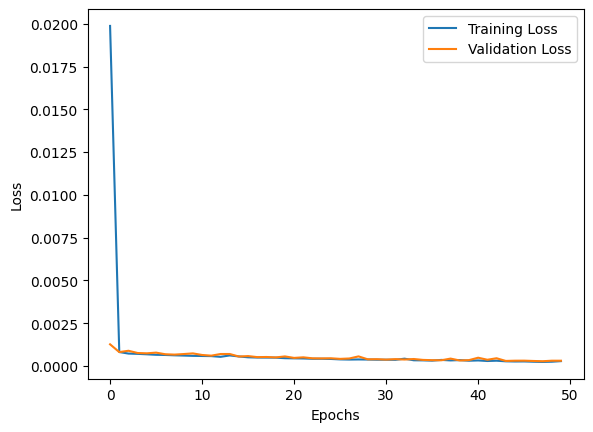

In [12]:
# Step 5: Evaluate the model
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# Step 6: Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)


23/23 [==============================] - 1s 18ms/step


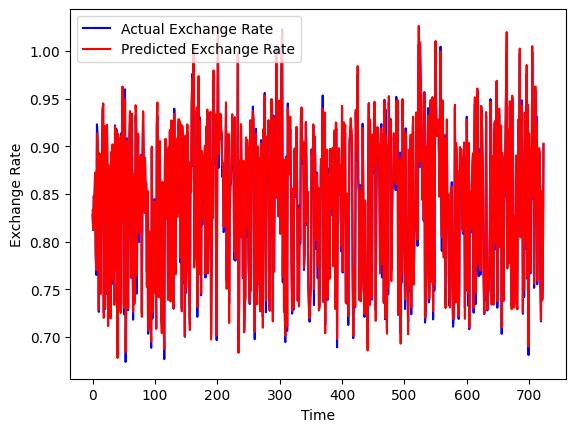

In [14]:
# Step 7: Visualize the results
plt.plot(y_test, color='blue', label='Actual Exchange Rate')
plt.plot(predictions, color='red', label='Predicted Exchange Rate')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Advanced Visualization

## Visualize Training and Validation Losses

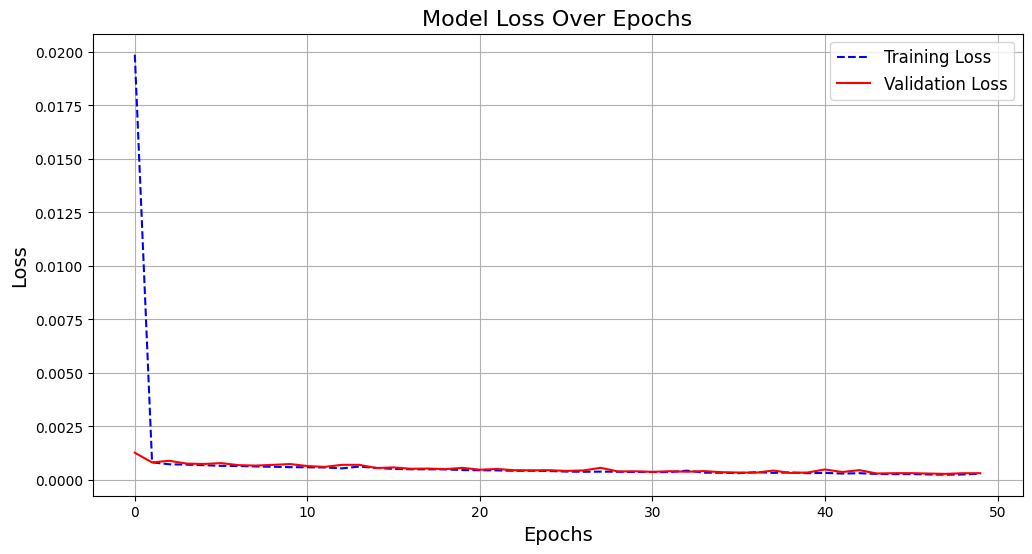

In [15]:
#Plot Loss Curves with Enhanced Details
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='--')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='-')
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


## Visualize Predictions vs. Actual Values

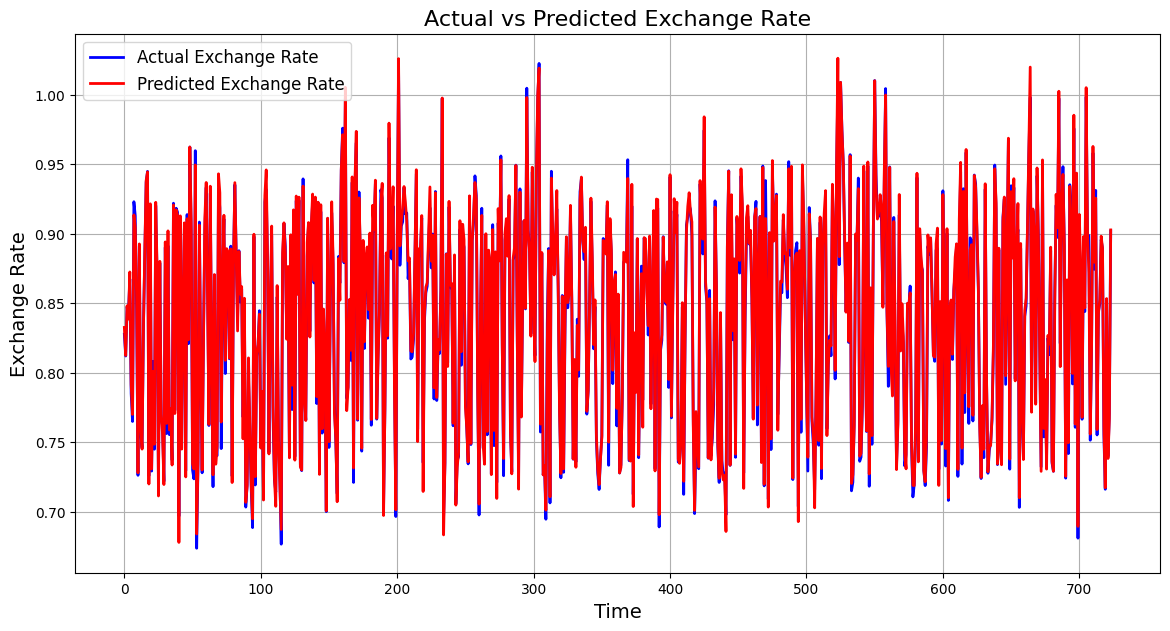

In [16]:
#Plot Predictions vs. Actual Values with Enhanced Details
# Plot actual vs predicted rates
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Actual Exchange Rate', linewidth=2)
plt.plot(predictions, color='red', label='Predicted Exchange Rate', linewidth=2)
plt.title('Actual vs Predicted Exchange Rate', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Exchange Rate', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


## Detailed Comparison of Predictions

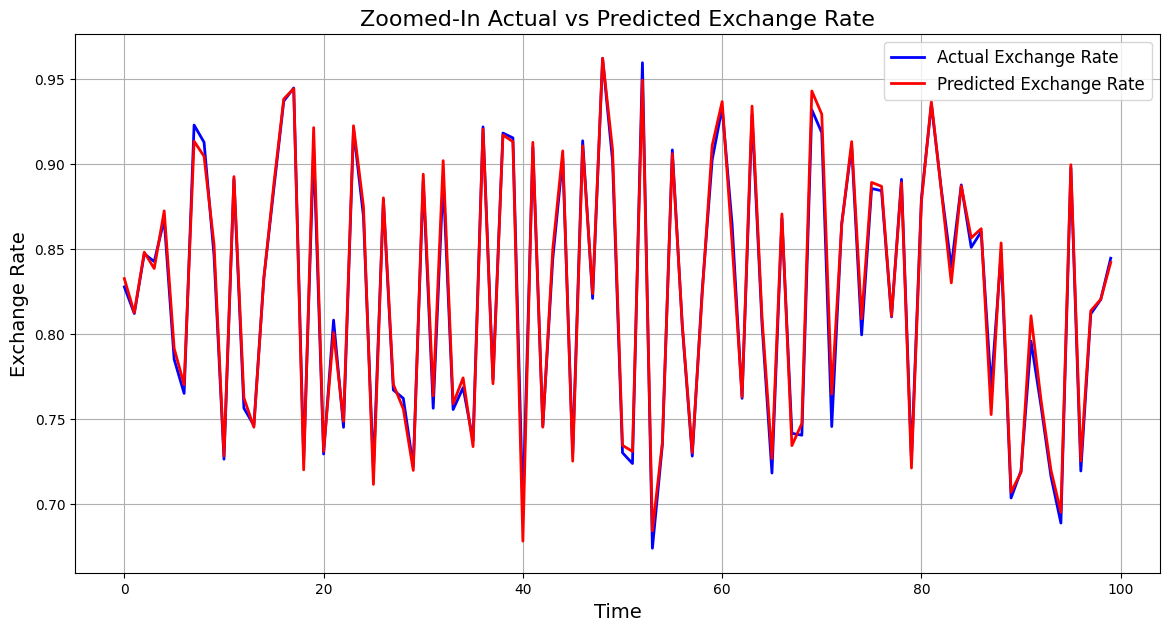

In [17]:
#Zoom in on a Specific Period
# Define the range to zoom in on
zoom_start = 0
zoom_end = 100  # Adjust this to the range you want to zoom in on

# Plot zoomed-in actual vs predicted rates
plt.figure(figsize=(14, 7))
plt.plot(y_test[zoom_start:zoom_end], color='blue', label='Actual Exchange Rate', linewidth=2)
plt.plot(predictions[zoom_start:zoom_end], color='red', label='Predicted Exchange Rate', linewidth=2)
plt.title('Zoomed-In Actual vs Predicted Exchange Rate', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Exchange Rate', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


## Error Analysis

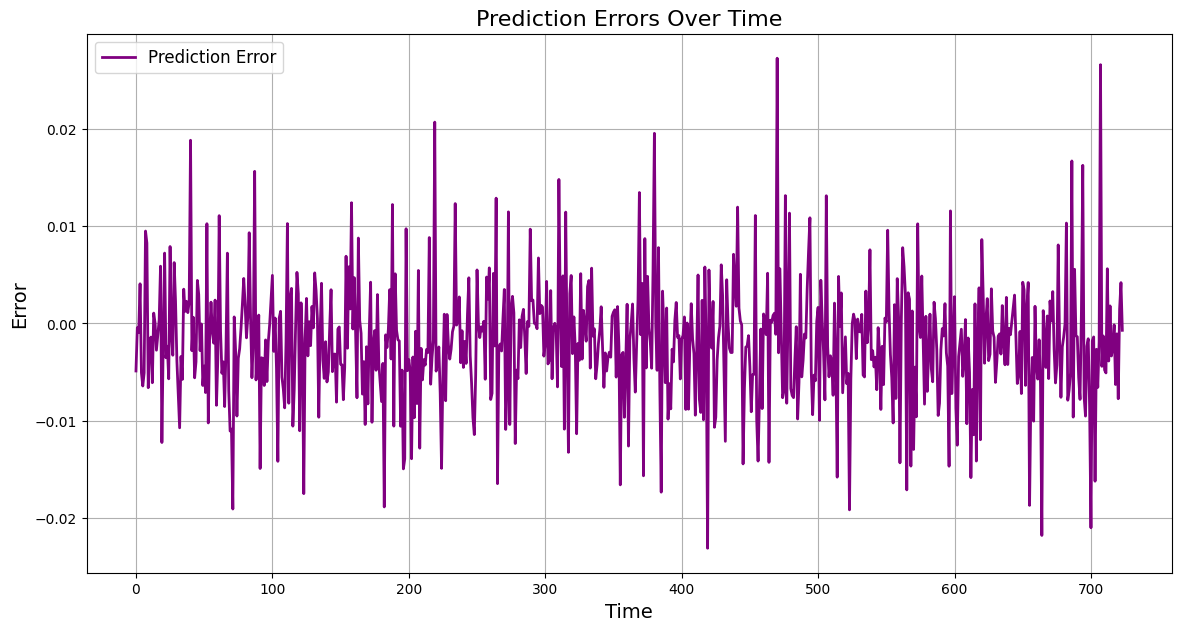

In [18]:
#Visualize Prediction Errors
# Calculate errors
errors = y_test - predictions

# Plot errors
plt.figure(figsize=(14, 7))
plt.plot(errors, color='purple', label='Prediction Error', linewidth=2)
plt.title('Prediction Errors Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


##Distribution of Errors

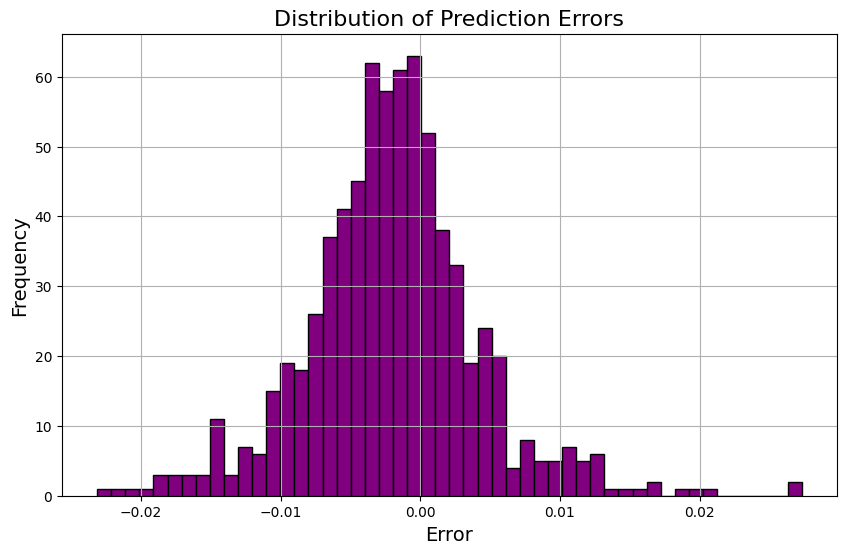

In [19]:
#Histogram of Errors
# Plot histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color='purple', edgecolor='black')
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.xlabel('Error', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


##Interactive Visualizations

In [20]:
#Use Plotly for Interactive Plots
import plotly.graph_objects as go

# Interactive plot for actual vs predicted rates
fig = go.Figure()
fig.add_trace(go.Scatter(y=y_test.flatten(), mode='lines', name='Actual', line=dict(color='blue')))
fig.add_trace(go.Scatter(y=predictions.flatten(), mode='lines', name='Predicted', line=dict(color='red')))
fig.update_layout(title='Actual vs Predicted Exchange Rate', xaxis_title='Time', yaxis_title='Exchange Rate')
fig.show()
